In [1]:
#Ejercicio 1
# Importamos las librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# Cargamos el archivo a Jupyter y lo cargamos mediante la función pd.read_csv.
# df.head nos devuelve las primeras columnas del data set
df = pd.read_csv('DelayedFlights.csv')
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [63]:
# Seleccionamos los encabezados de las columnas del excel, que nos resultan de interés.
#Year: El año en el que se registró el vuelo.
#Month: El mes en el que se registró el vuelo.
#DayOfWeek: El día de la semana en el que se registró el vuelo.
#DepTime: Hora de salida del vuelo.
#ArrTime: Hora de llegada del vuelo.
#UniqueCarrier: Código único que identifica a la aerolínea.
#Origin: Aeropuerto de origen.
#Dest: Aeropuerto de destino.
#Distance: Distancia del uelo.
#ArrDelay: Retraso en la llegada del vuelo.

columnas_relevantes = ['Year', 'Month', 'DayOfWeek', 'DepTime', 'ArrTime', 'UniqueCarrier', 'Origin', 'Dest', 'Distance', 'ArrDelay']
df_reducido = df[columnas_relevantes]

# Reducimos la dimensión de manera aleatoria a 200.000 registros.
df_reducido = df_reducido.sample(n=200000)

# Mostramos las primeras filas del DataFrame reducido.
print("**Primeras filas del DataFrame reducido:**\n")
print(df_reducido.head())

# Resumen estadístico
print("\n**Resumen estadístico del DataFrame reducido:**\n")
resumen_estadistico = df_reducido.describe()
print(resumen_estadistico)

# Tipo de variables que hay en el conjunto de datos
print("\n**Información sobre el DataFrame:**\n")
df.info()

**Primeras filas del DataFrame reducido:**

         Year  Month  DayOfWeek  DepTime  ArrTime UniqueCarrier Origin Dest  Distance  ArrDelay
499548   2008      3          3   1657.0   1756.0            MQ    DFW  SPS       113      39.0
933576   2008      6          5   2120.0   2235.0            YV    CAE  ORD       666     216.0
771860   2008      5          5   1839.0   1911.0            YV    DEN  COS        72      12.0
479104   2008      3          5   1034.0   1133.0            EV    ATL  TLH       223      13.0
1687674  2008     11          1    838.0   1019.0            EV    MLB  ATL       443      12.0

**Resumen estadístico del DataFrame reducido:**

           Year          Month      DayOfWeek        DepTime        ArrTime       Distance       ArrDelay
count  200000.0  200000.000000  200000.000000  200000.000000  199238.000000  200000.000000  199120.000000
mean     2008.0       6.101065       3.988945    1520.671540    1612.225650     766.365910      42.167387
std         

In [50]:
#Ejercicio 2

#Resumen estadistico del conjunto de datos y columnas
df.describe(include="all")

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1936758,1.936758e+06,1936753,1.928371e+06,1.936560e+06,1.928371e+06,1.928371e+06,1.936758e+06,1936758,1936758,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1936758,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,5366,NaN,NaN,NaN,NaN,NaN,303,304,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WN,NaN,N325SW,NaN,NaN,NaN,NaN,NaN,ATL,ORD,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,377602,NaN,965,NaN,NaN,NaN,NaN,NaN,131613,108984,NaN,NaN,NaN,NaN,1936125,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,NaN,2.184263e+03,NaN,1.333059e+02,1.343027e+02,1.082771e+02,4.219988e+01,4.318518e+01,NaN,NaN,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,NaN,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,NaN,1.944702e+03,NaN,7.206007e+01,7.134144e+01,6.864261e+01,5.678472e+01,5.340250e+01,NaN,NaN,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,NaN,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,NaN,1.000000e+00,NaN,1.400000e+01,-2.500000e+01,0.000000e+00,-1.090000e+02,6.000000e+00,NaN,NaN,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,NaN,6.100000e+02,NaN,8.000000e+01,8.200000e+01,5.800000e+01,9.000000e+00,1.200000e+01,NaN,NaN,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,NaN,1.543000e+03,NaN,1.160000e+02,1.160000e+02,9.000000e+01,2.400000e+01,2.400000e+01,NaN,NaN,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,NaN,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,NaN,3.422000e+03,NaN,1.650000e+02,1.650000e+02,1.370000e+02,5.600000e+01,5.300000e+01,NaN,NaN,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,NaN,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01


In [51]:
#Con la siguiente función vemos cuantos datos faltan por columna.  
df.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [3]:
df_temp = df.drop(['Year', 'Month', 'DayofMonth','UniqueCarrier', 'Origin', 'Dest'], axis='columns') 
df[df['NASDelay'].isna()].count() 

df.Cancelled.value_counts()

df[df.ArrDelay < 15].count() 

Unnamed: 0           680883
Year                 680883
Month                680883
DayofMonth           680883
DayOfWeek            680883
DepTime              680883
CRSDepTime           680883
ArrTime              680883
CRSArrTime           680883
UniqueCarrier        680883
FlightNum            680883
TailNum              680882
ActualElapsedTime    680883
CRSElapsedTime       680883
AirTime              680883
ArrDelay             680883
DepDelay             680883
Origin               680883
Dest                 680883
Distance             680883
TaxiIn               680883
TaxiOut              680883
Cancelled            680883
CancellationCode     680883
Diverted             680883
CarrierDelay              0
WeatherDelay              0
NASDelay                  0
SecurityDelay             0
LateAircraftDelay         0
Velocidad Media      680883
dtype: int64

Media de retraso por llegada: 42.19988477321014
Desv. estándar de los retrasos de llegada: 56.78471513743561


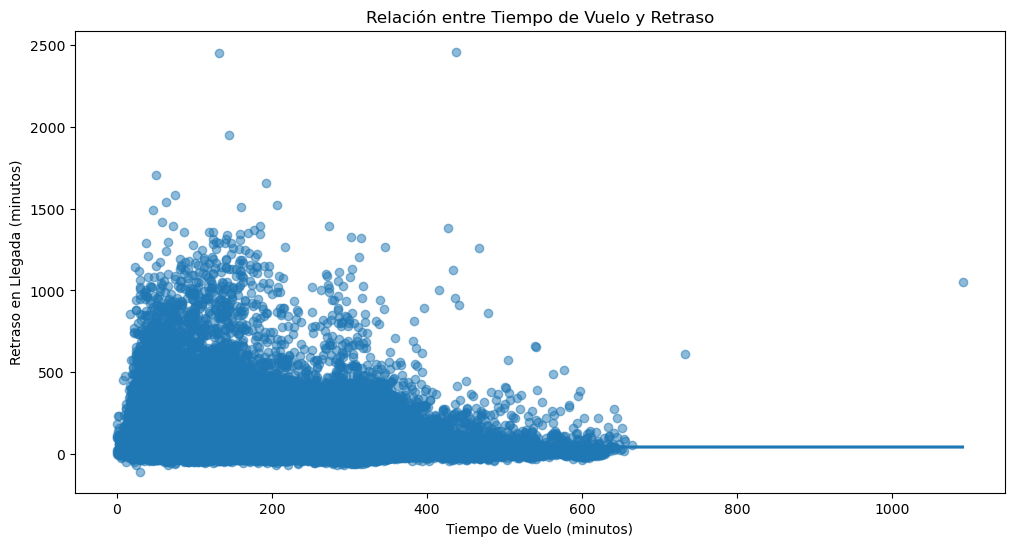

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('DelayedFlights.csv')

# Media y desviación estándar de los retrasos por llegada
print("Media de retraso por llegada:", df['ArrDelay'].mean())
print("Desv. estándar de los retrasos de llegada:", df['ArrDelay'].std())

# Suponemos que "AirTime" representa el tiempo de vuelo en minutos
# Corrección en el cálculo de la velocidad media
df['Velocidad Media'] = df['Distance'] / df['AirTime']

# Gráfico de dispersión entre el tiempo de vuelo y el retraso con línea de tendencia
plt.figure(figsize=(12, 6))
sns.regplot(x='AirTime', y='ArrDelay', data=df, scatter_kws={'alpha':0.5})
plt.title('Relación entre Tiempo de Vuelo y Retraso')
plt.xlabel('Tiempo de Vuelo (minutos)')
plt.ylabel('Retraso en Llegada (minutos)')
plt.show()


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_hist_and_boxplot(df, feature):
    plt.figure(figsize=(12, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Histograma de {feature}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot de {feature}')

    plt.show()


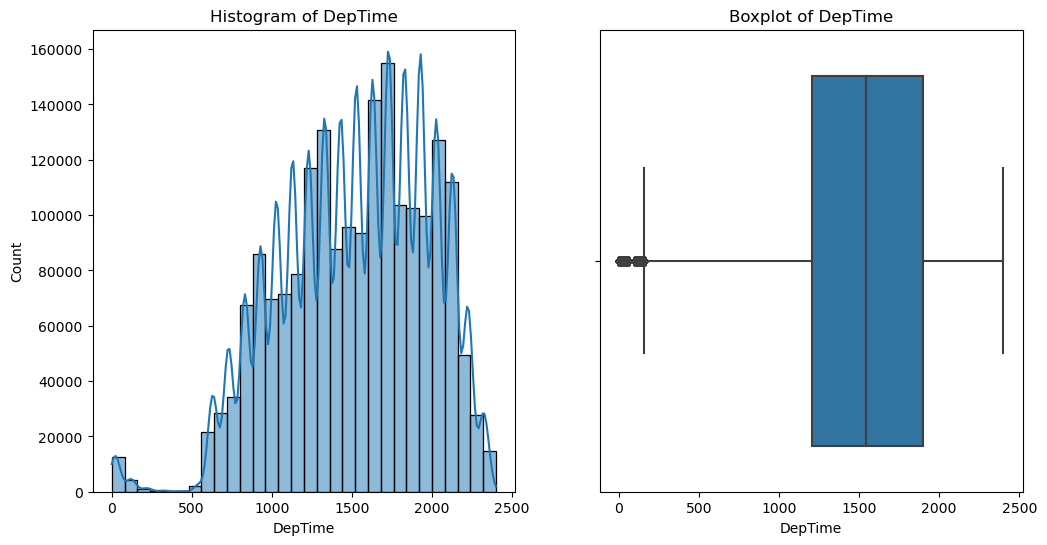

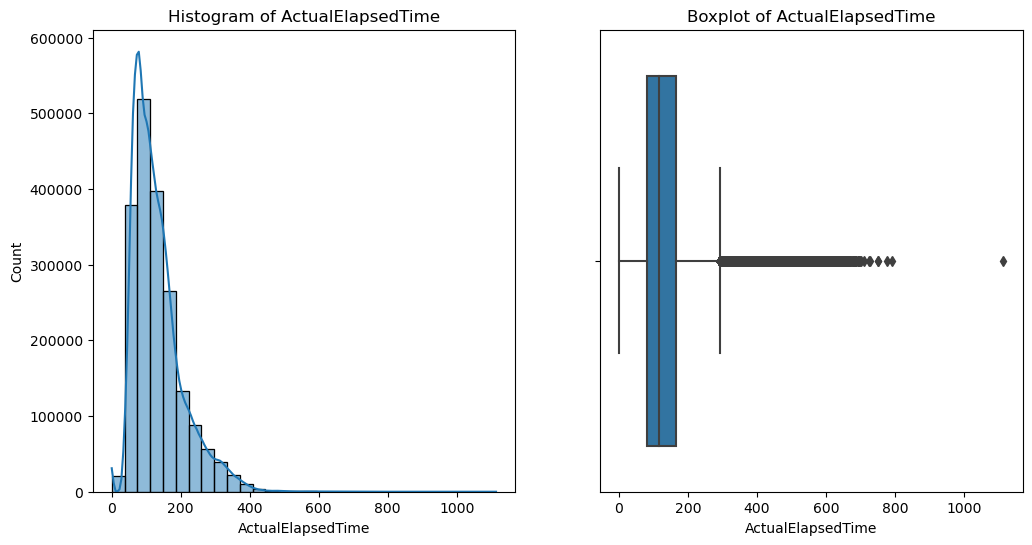

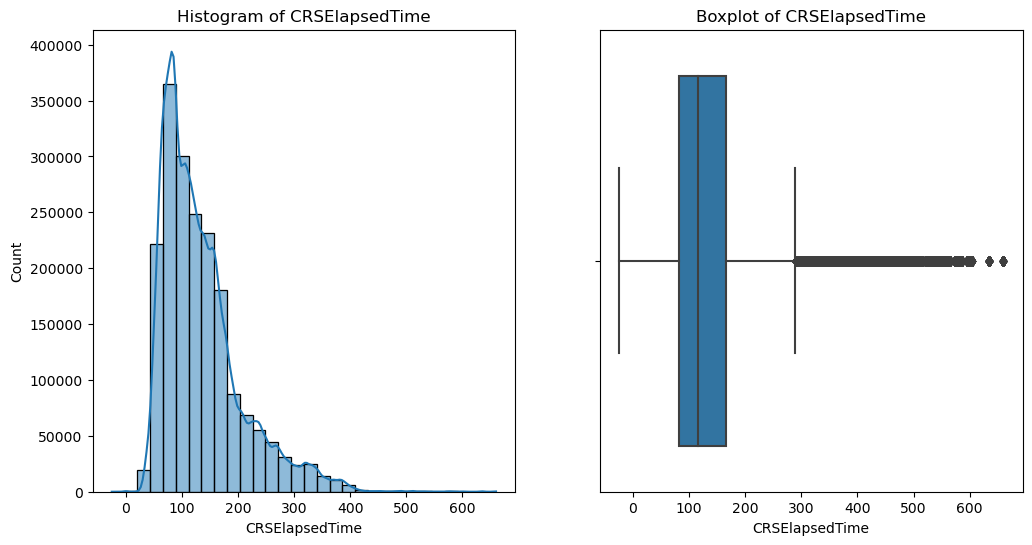

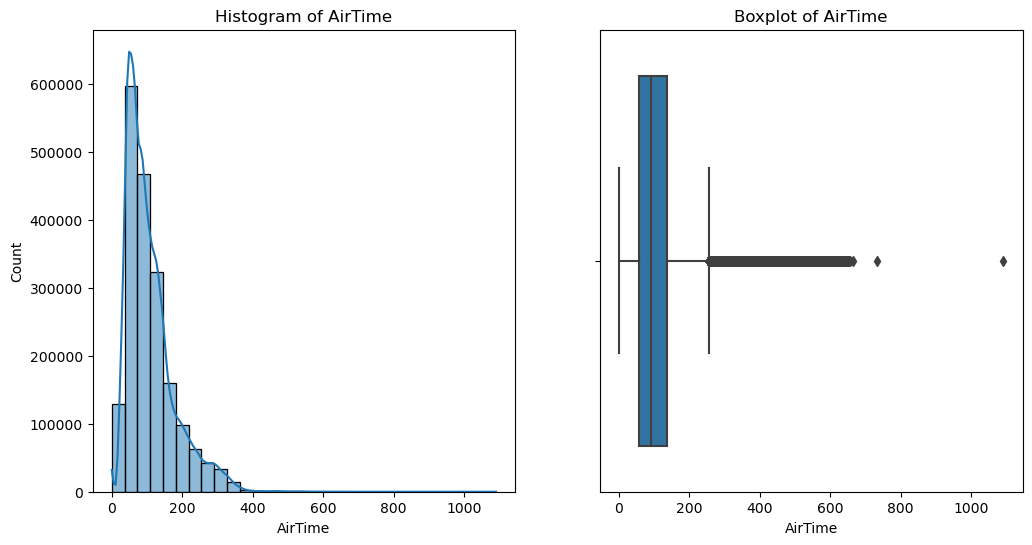

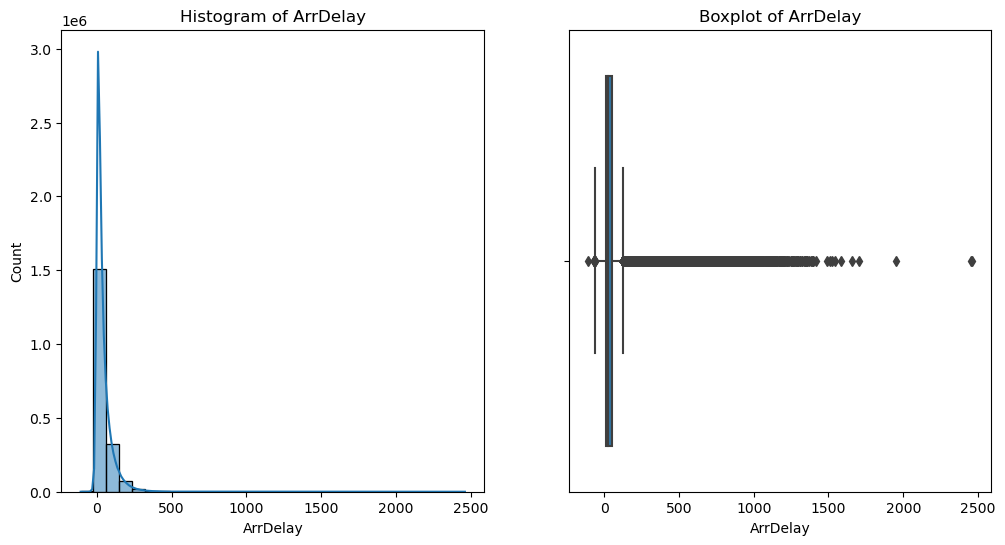

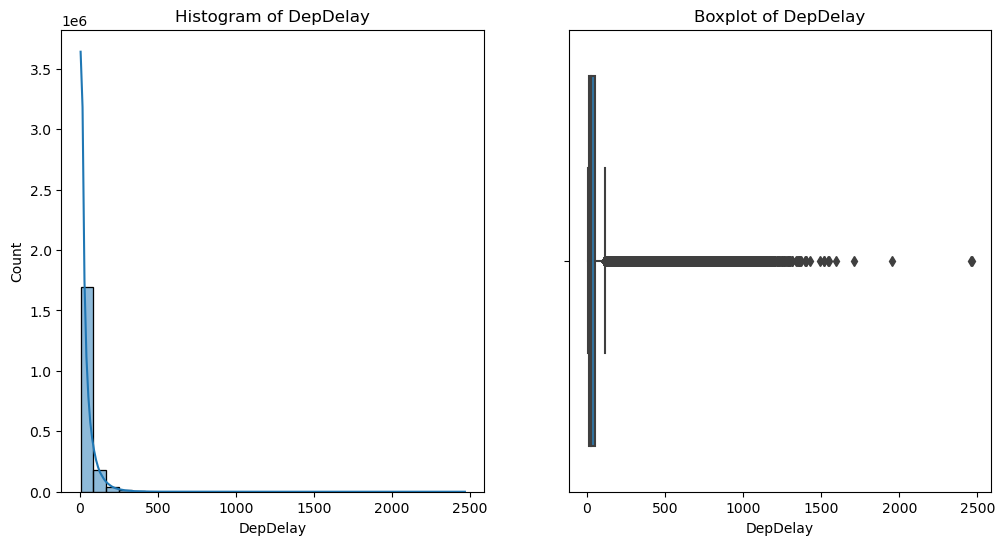

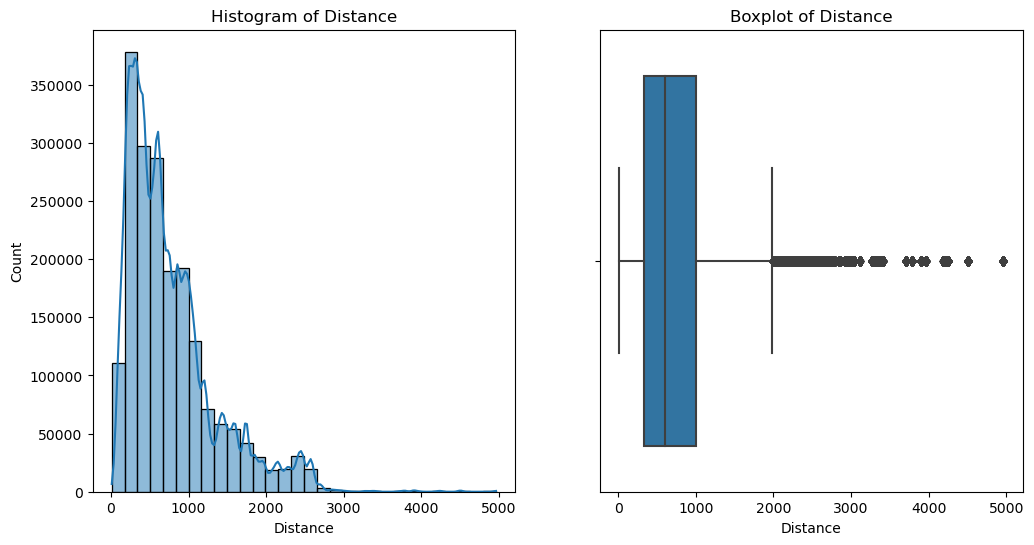

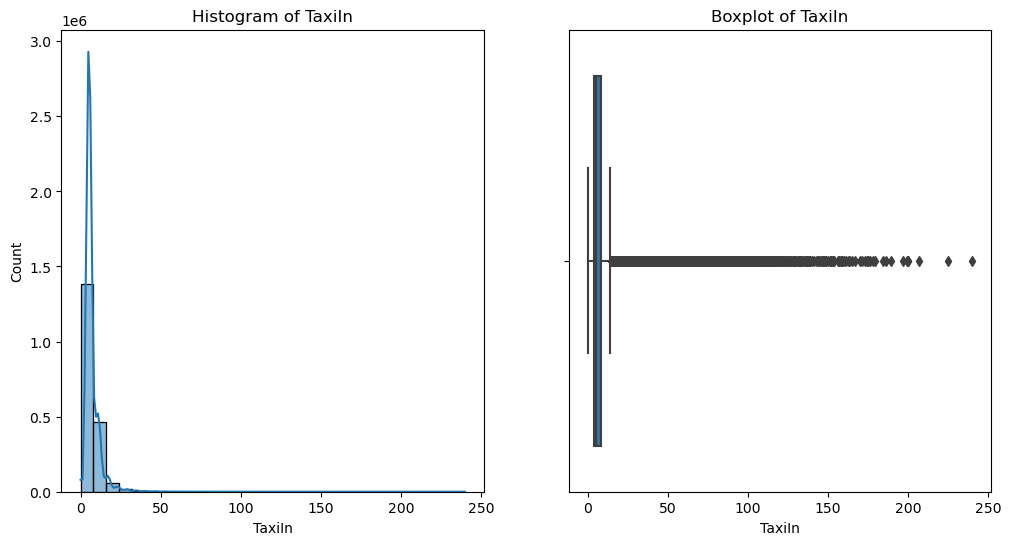

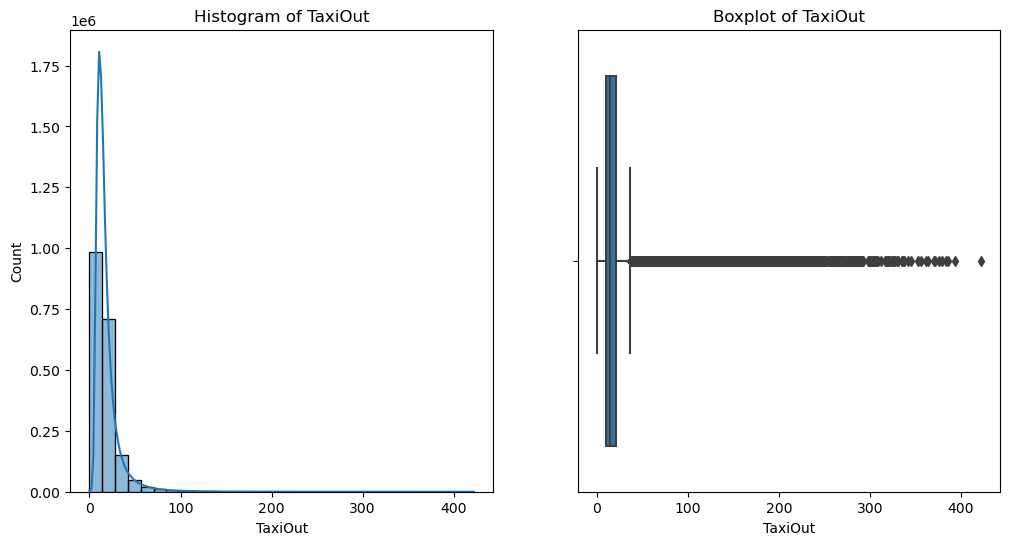

In [10]:
for col in ['DepTime', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance', 'TaxiIn', 'TaxiOut']:
    plot_hist_and_boxplot(df, col)


In [20]:
def count_plot(df, feature):
    # sns.set(color_codes = 'Blue', style="whitegrid")
    # sns.set_style("whitegrid", {'axes.grid' : False})
    # sns.set_context(rc = {'patch.linewidth': 0.0})
    fig = plt.subplots(figsize=(10,3))
    sns.countplot(x=feature, data=df, color = 'steelblue') # countplot
    plt.show()

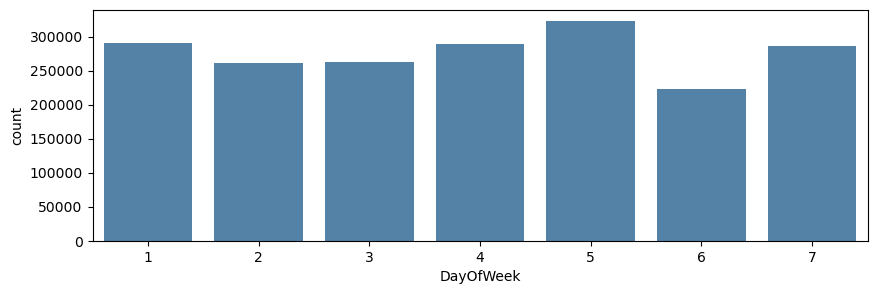

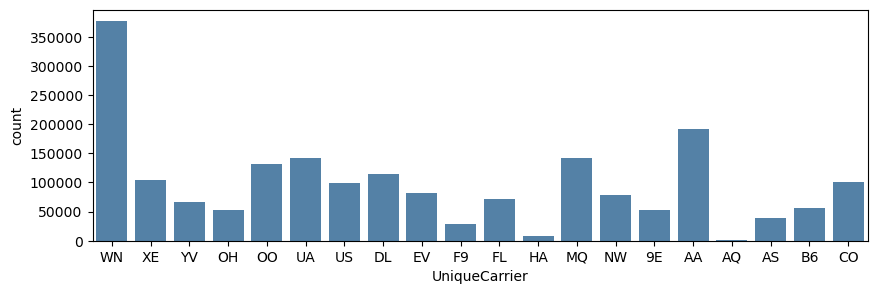

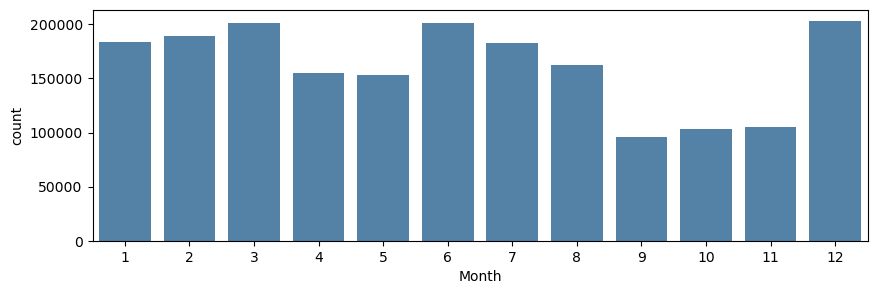

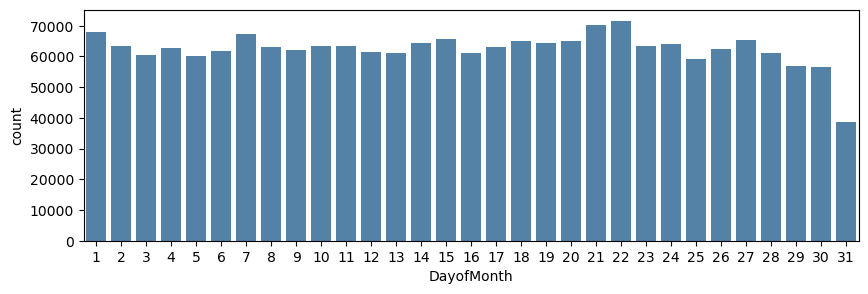

In [12]:
for col in ['DayOfWeek','UniqueCarrier','Month','DayofMonth']:
    count_plot(df,col)

In [13]:
# Creamos nuevas columnas
#Velocidad de los vuelos
df['average_flight_speed (miles/min)'] = df.Distance / df.AirTime

# Hora de salida de los vuelos
dep_time = pd.to_datetime(df.Year*10000 + df.Month*100 + df.DayofMonth, format='%Y%m%d') #año/mes/dia
df.insert(loc = 0, column = 'DepDate', value = dep_time)
df = df.drop("Year", axis = 1) 
df = df.drop("Month", axis = 1)
df = df.drop("DayofMonth", axis = 1)

# Estatus de los aviones
df.loc[:, 'Status'] = 'NOTHING'
df.loc[df.ArrDelay <= 15, 'Status'] = 0 # on time
df.loc[df.ArrDelay > 15, 'Status'] = 1 # slightly delayed
df.loc[df.ArrDelay >= 60, 'Status'] = 2 # hightly delayed
df.loc[df.Diverted == 1, 'Status'] = 3
df.loc[df.Cancelled == 1, 'Status'] = 4

df = df.drop("Cancelled", axis=1)
df = df.drop("Diverted", axis = 1)

In [15]:
#Tabla con vuelos con más retraso acumulado
import pandas as pd

# cargamos el csv
df = pd.read_csv('DelayedFlights.csv')

# Remplazamos'UniqueCarrier' y 'ArrDelay'  con el nombre actual de las columnas
tabla_retrasos = df.groupby(['UniqueCarrier'], as_index=False)['ArrDelay'].sum().sort_values(by='ArrDelay', ascending=False)

print(tabla_retrasos)



   UniqueCarrier    ArrDelay
17            WN  11319092.0
1             AA   8889066.0
15            UA   6733013.0
11            MQ   6396704.0
14            OO   5978936.0
18            XE   5176042.0
6             DL   4535644.0
5             CO   4045932.0
7             EV   3888131.0
19            YV   3691461.0
16            US   3571867.0
12            NW   3462075.0
9             FL   3100150.0
4             B6   3025749.0
13            OH   2675993.0
0             9E   2420468.0
3             AS   1406735.0
8             F9    788549.0
10            HA    255613.0
2             AQ     15814.0


In [10]:
# 10 vuelos más largos
print("Vuelos con más distancia:\n")
print(df.sort_values(by='AirTime', ascending=False).head(10))

# 10 vuelos más cortos
print("\Vuelos con menos distancia:\n")
print(df.sort_values(by='AirTime', ascending=True).head(10))

Vuelos con más distancia:

         Unnamed: 0  Year  Month  DayofMonth  DayOfWeek  DepTime  CRSDepTime  \
1488690     5180146  2008      9           9          2   1411.0         920   
1367047     4614554  2008      8          19          2   1547.0        1230   
362529      1139464  2008      2          21          4   1337.0        1320   
556381      1742567  2008      3          21          5   1345.0        1320   
556385      1742573  2008      3          27          4   1426.0        1320   
556379      1742565  2008      3          19          3   1326.0        1320   
556377      1742563  2008      3          17          1   1534.0        1320   
556386      1742574  2008      3          28          5   1329.0        1320   
362852      1140385  2008      2          20          3   1331.0        1320   
363750      1142728  2008      2          22          5   1345.0        1320   

         ArrTime  CRSArrTime UniqueCarrier  ...  TaxiIn TaxiOut  Cancelled  \
1488690    545

In [17]:
# Eliminamos los retrasos negativos y los vuelos con tiempo de vuelo inferior a 5 minutos, ya que no tienen sentido
drop_indices = df[df.ArrDelay < 0].index
df.drop(drop_indices, inplace=True)

drop_indices = df[df.AirTime < 5].index
df.drop(drop_indices, inplace=True)

# Vemoslos 30 vuelos ordenados por el tiempo de vuelo más largo y el mayor retraso
vuelos_largos_y_retrasados = df.sort_values(by=['AirTime', 'ArrDelay'], ascending=[False, False]).iloc[0:30][['AirTime', 'ArrDelay']]

# Finalmente, creemos una columna que sea ArrDelay/AirTime
df["ProportionalDelay"] = (df.ArrDelay / df.AirTime).round(2)

# Mostramo los 30 vuelos más 'atrasados' según la proporción de retraso
print("Los vuelos más 'atrasados':\n")
vuelos_atrasados = df.sort_values(by='ProportionalDelay', ascending=False).iloc[0:30][['AirTime', 'ArrDelay', 'ProportionalDelay']]
print(vuelos_atrasados)


Los vuelos más 'atrasados':

         AirTime  ArrDelay  ProportionalDelay
1242423      8.0     455.0              56.88
830327      17.0     859.0              50.53
1220767     23.0    1143.0              49.70
616349      10.0     475.0              47.50
676451      28.0    1118.0              39.93
676456      24.0     944.0              39.33
128691      24.0     881.0              36.71
315621      30.0    1064.0              35.47
1697436     25.0     878.0              35.12
1033660     22.0     768.0              34.91
668492      37.0    1290.0              34.86
1009553     50.0    1707.0              34.14
1499943     30.0    1022.0              34.07
677081      22.0     743.0              33.77
1490123     30.0    1012.0              33.73
658458      22.0     737.0              33.50
309194      29.0     948.0              32.69
143782      30.0     973.0              32.43
1876394     18.0     575.0              31.94
521096      47.0    1490.0              31.70
67440

In [ ]:
# Ejercicio 3
df = pd.read_excel('C:\\Users\\Dayan Gonzalez\\Downloads\\DelayedFlights.xlsx')
df.to_excel('C:\\Users\\Dayan Gonzalez\\Downloads\\DelayedFlights.xlsx', sheet_name='vuelos')
